In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline

In [5]:

nafa_data = pd.read_csv("ai4i2020.csv") # Membaca file CSV "ai4i2020.csv" dan menyimpannya ke dalam DataFrame 'data'
nafa_data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


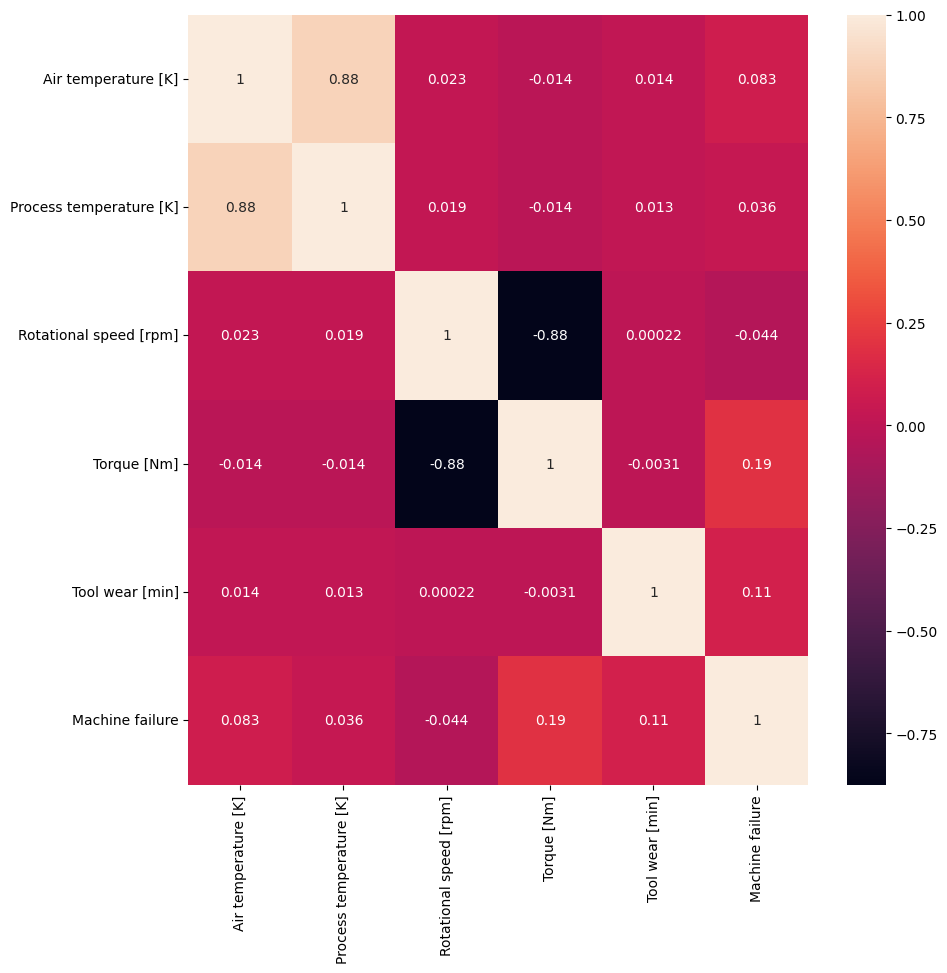

In [20]:
# create correlation matrix from the data
corr_matrix = nafa_data[["Air temperature [K]", "Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]", "Machine failure"]].corr()
# visualize the correlation matrix using seaborn with dpecified fig size
fig, ax = plt.subplots(figsize=(10,10)) # Membuat subplot dengan ukuran gambar 5x5 inci
sns.heatmap(corr_matrix, annot=True) # Menggambar heatmap untuk matrix korelasi dengan tanda anotasi diaktifkan
plt.show() # Menampilkan plot heatmap

In [11]:
nafatarget = nafa_data["Machine failure"].to_numpy() # Memilih kolom "Machine failure" sebagai target dan mengonversinya menjadi array numpy
# Memilih kolom-kolom lain sebagai fitur (features) dan menghapus kolom "Machine failure", lalu mengonversi ke dalam array numpy
nafafeature = nafa_data[["Air temperature [K]", "Process temperature [K]","Rotational speed [rpm]","Torque [Nm]","Tool wear [min]", "Machine failure"]].copy().drop(["Machine failure"], axis=1).to_numpy()

In [12]:
nafafeature_train, nafafeature_test, nafatarget_train, nafatarget_test = train_test_split(feature, target, test_size=0.3, random_state=1234)

In [13]:
logistic_regressor = LogisticRegression(solver='liblinear',max_iter=200)
logistic_regressor.fit(nafafeature_train, nafatarget_train)

LogisticRegression(max_iter=200, solver='liblinear')

In [16]:
nafatest_pred = logistic_regressor.predict(nafafeature_test)

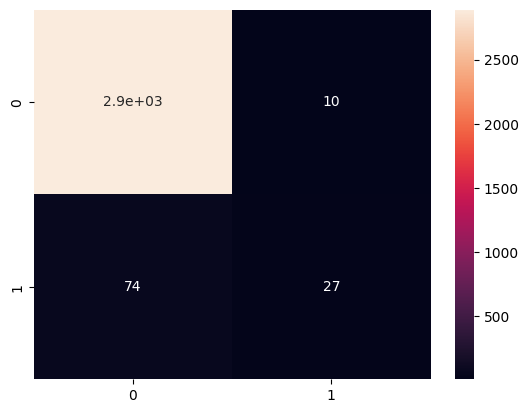

In [17]:
conf_mat = metrics.confusion_matrix(nafatarget_test, nafatest_pred)
# visualize the conf_mat using sns
sns.heatmap(conf_mat, annot=True)
plt.show()

In [19]:
# Hitung accuracy
accuracy = (conf_mat[0,0] + conf_mat[1,1]) / np.sum(conf_mat)

# Hitung sensitivity (true positive rate)
sensitivity = conf_mat[1,1] / (conf_mat[1,0] + conf_mat[1,1])

# Hitung specificity (true negative rate)
specificity = conf_mat[0,0] / (conf_mat[0,0] + conf_mat[0,1])

# Hitung precision
precision = conf_mat[1,1] / (conf_mat[0,1] + conf_mat[1,1])

# Menampilkan hasil
print('Accuracy    = {}'.format(np.round(accuracy, 3))) #Accuracy mengukur seberapa akurat model dalam memprediksi kelas secara keseluruhan
print('Sensitivity = {}'.format(np.round(sensitivity, 3))) #Sensitivity mengukur seberapa baik model dalam mengidentifikasi kelas positif (dalam kasus ini, kelas 1) di antara semua kasus yang sebenarnya positif
print('Specificity = {}'.format(np.round(specificity, 3))) #Specificity mengukur seberapa baik model dalam mengidentifikasi kelas negatif (dalam kasus ini, kelas 0) di antara semua kasus yang sebenarnya negatif
print('Precision   = {}'.format(np.round(precision, 3))) #Precision mengukur seberapa banyak prediksi positif yang sebenarnya benar (dari semua prediksi positif)


Accuracy    = 0.972
Sensitivity = 0.267
Specificity = 0.997
Precision   = 0.73
